# PMU Data Cleaning and Exploratory Data Analysis (EDA)

This notebook covers the following steps:
1. Convert the raw PMU Excel data to CSV format.
2. Rename columns to meaningful names based on hypotheses.
3. Provide a table of column descriptions.
4. Perform exploratory data analysis (EDA) with visualizations.

## PMU Data Column Descriptions

| Feature           | Likely Meaning                                      |
|-------------------|-----------------------------------------------------|
| timestamp         | Time of the reading (every 0.02s)                   |
| delay_at_arrival  | Delay from signal transmission to reception         |
| frequency         | Instantaneous frequency (Hz)                        |
| df/dt             | Rate of change of frequency                         |
| V_a_mag           | Voltage magnitude in Phase A                        |
| V_a_ang           | Voltage angle in Phase A                            |
| I_a_mag           | Current magnitude in Phase A                        |
| I_a_ang           | Current angle in Phase A                            |
| V_b_mag           | Voltage magnitude in Phase B                        |
| V_b_ang           | Voltage angle in Phase B                            |
| I_b_mag           | Current magnitude in Phase B                        |
| I_b_ang           | Current angle in Phase B                            |
| V_c_mag           | Voltage magnitude in Phase C                        |
| V_c_ang           | Voltage angle in Phase C                            |
| I_c_mag           | Current magnitude in Phase C                        |
| I_c_ang           | Current angle in Phase C                            |
| label             | 0 (normal), 1 (anomaly), 2 (SLG), 3 (LL), 4 (LLG)   |

In [ ]:
import pandas as pd
import os

excel_path = '../data/raw/PMU_data.xlsx'
csv_path = '../data/processed/PMU_data.csv'

df = pd.read_excel(excel_path)
column_mapping = {
    df.columns[0]: 'timestamp',
    df.columns[1]: 'delay_at_arrival',
    df.columns[2]: 'frequency',
    df.columns[3]: 'df/dt',
    df.columns[4]: 'V_a_mag',
    df.columns[5]: 'V_a_ang',
    df.columns[6]: 'I_a_mag',
    df.columns[7]: 'I_a_ang',
    df.columns[8]: 'V_b_mag',
    df.columns[9]: 'V_b_ang',
    df.columns[10]: 'I_b_mag',
    df.columns[11]: 'I_b_ang',
    df.columns[12]: 'V_c_mag',
    df.columns[13]: 'V_c_ang',
    df.columns[14]: 'I_c_mag',
    df.columns[15]: 'I_c_ang',
    df.columns[16]: 'label'
}
df.rename(columns=column_mapping, inplace=True)

df.to_csv(csv_path, index=False)

df.head()

,timestamp,delay_at_arrival,frequency,df/dt,V_a_mag,V_a_ang,I_a_mag,I_a_ang,V_b_mag,V_b_ang,I_b_mag,I_b_ang,V_c_mag,V_c_ang,I_c_mag,I_c_ang,label
0,0,0.041158,50.014973,0.105413,12330.49316,2.434143,6.173104,2.594195,12355.28223,0.341338,5.400779,0.377317,12304.64258,-1.748062,5.250762,-1.524829,0
1,1,0.040803,50.002144,-0.010861,12327.85840,2.780275,5.982968,2.946683,12352.78320,0.687731,5.221993,0.726459,12304.61035,-1.401731,5.051753,-1.169805,0
2,2,0.039932,49.987171,-0.002415,12317.62305,2.494382,5.971821,2.656734,12343.67090,0.401813,5.192584,0.438961,12294.09180,-1.687766,5.054627,-1.455235,0
3,3,0.040460,49.980846,0.008056,12319.24414,1.475278,5.985885,1.636201,12344.62500,-0.617547,5.225528,-0.579584,12293.43066,-2.706916,5.073850,-2.478405,0
4,4,0.040020,49.974667,0.004987,12297.65820,0.156260,5.995246,0.321282,12318.87695,-1.936581,5.257210,-1.892123,12269.51758,2.257562,5.114569,2.483838,0


## Exploratory Data Analysis (EDA)

Let's explore the cleaned PMU data to understand its structure, distributions, and potential anomalies.

In [ ]:
df = pd.read_csv(csv_path)


print('DataFrame Info:')
df.info()


display(df.describe())
print('\nMissing values per column:')
print(df.isnull().sum())
print('\nLabel distribution:')
print(df['label'].value_counts())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101647 entries, 0 to 101646
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         101647 non-null  int64  
 1   delay_at_arrival  101647 non-null  float64
 2   frequency         101647 non-null  float64
 3   df/dt             101647 non-null  float64
 4   V_a_mag           101647 non-null  float64
 5   V_a_ang           101647 non-null  float64
 6   I_a_mag           101647 non-null  float64
 7   I_a_ang           101647 non-null  float64
 8   V_b_mag           101647 non-null  float64
 9   V_b_ang           101647 non-null  float64
 10  I_b_mag           101647 non-null  float64
 11  I_b_ang           101647 non-null  float64
 12  V_c_mag           101647 non-null  float64
 13  V_c_ang           101647 non-null  float64
 14  I_c_mag           101647 non-null  float64
 15  I_c_ang           101647 non-null  float64
 16  labe

,timestamp,delay_at_arrival,frequency,df/dt,V_a_mag,V_a_ang,I_a_mag,I_a_ang,V_b_mag,V_b_ang,I_b_mag,I_b_ang,V_c_mag,V_c_ang,I_c_mag,I_c_ang,label
count,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000,101647.000000
mean,37863.042500,0.041137,49.993722,-0.000398,12214.055037,0.008271,4.999566,-0.044882,11625.805290,0.030026,4.447964,0.037073,11576.381211,-0.043135,4.704696,-0.076903,0.150000
std,26325.951148,0.001147,0.023983,0.063698,79.763907,1.842169,2.586293,1.711596,2668.540203,1.789524,2.857220,1.740385,2657.157907,1.810094,1.914736,1.754035,0.357073
min,0.000000,0.038100,49.880836,-3.562482,11782.293950,-3.141370,0.000000,-3.141541,0.000000,-3.141546,-4.562758,-3.141583,0.000000,-3.141573,0.000000,-3.141474,0.000000
25%,12705.500000,0.040410,49.977253,-0.008228,12166.025390,-1.626049,4.084468,-1.475540,12171.898440,-1.490947,4.045711,-1.384581,12119.490725,-1.590007,4.295932,-1.550998,0.000000
50%,35576.000000,0.041103,49.994766,-0.000199,12226.201170,0.030867,4.903162,0.000000,12240.712890,0.061290,4.795136,0.000000,12185.646480,-0.099134,4.609756,0.000000,0.000000
75%,60987.500000,0.041845,50.010456,0.007875,12266.965820,1.615651,6.025582,1.312485,12295.278810,1.566291,5.600879,1.462933,12238.138670,1.518391,5.333293,1.370725,0.000000
max,86399.000000,0.052589,50.108902,2.003288,12415.325200,3.141586,13.760777,3.141356,12452.697270,3.141563,13.855930,3.141527,12388.170900,3.141451,13.373906,3.141534,1.000000



Missing values per column:
timestamp           0
delay_at_arrival    0
frequency           0
df/dt               0
V_a_mag             0
V_a_ang             0
I_a_mag             0
I_a_ang             0
V_b_mag             0
V_b_ang             0
I_b_mag             0
I_b_ang             0
V_c_mag             0
V_c_ang             0
I_c_mag             0
I_c_ang             0
label               0
dtype: int64

Label distribution:
label
0    86400
1    15247
Name: count, dtype: int64


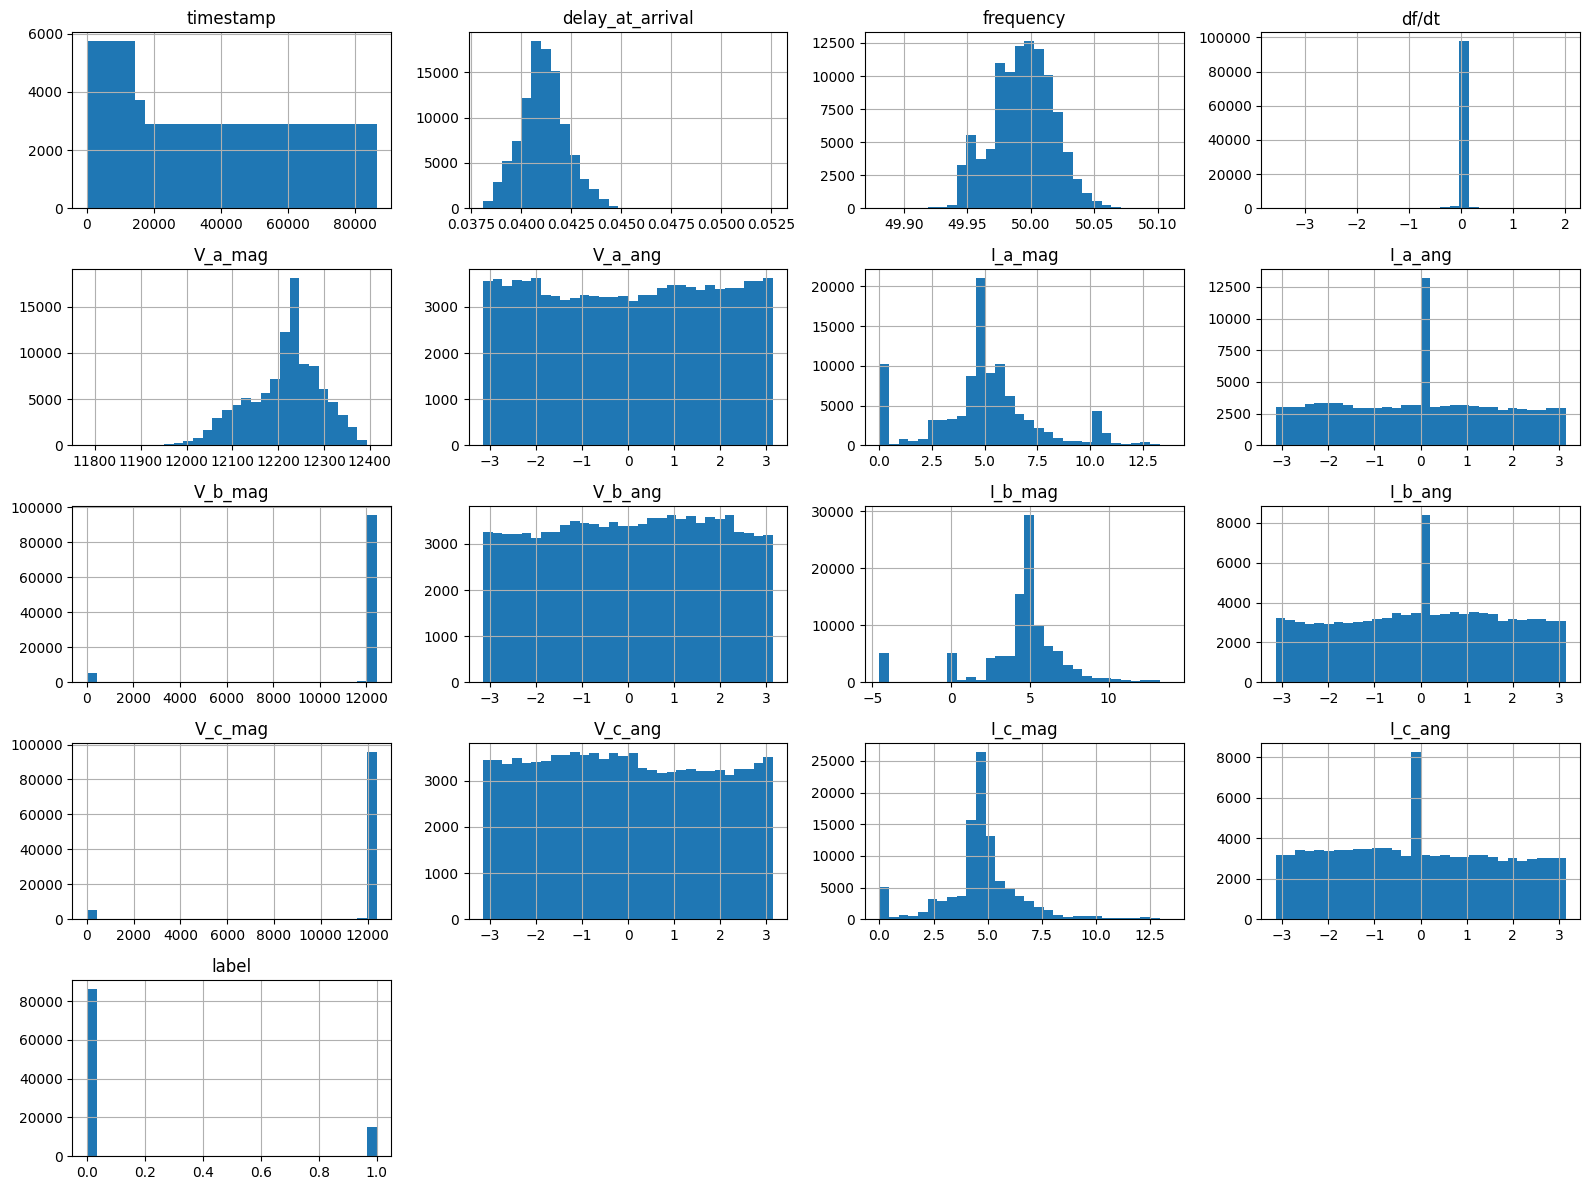

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(16, 12), bins=30)
plt.tight_layout()
plt.show()


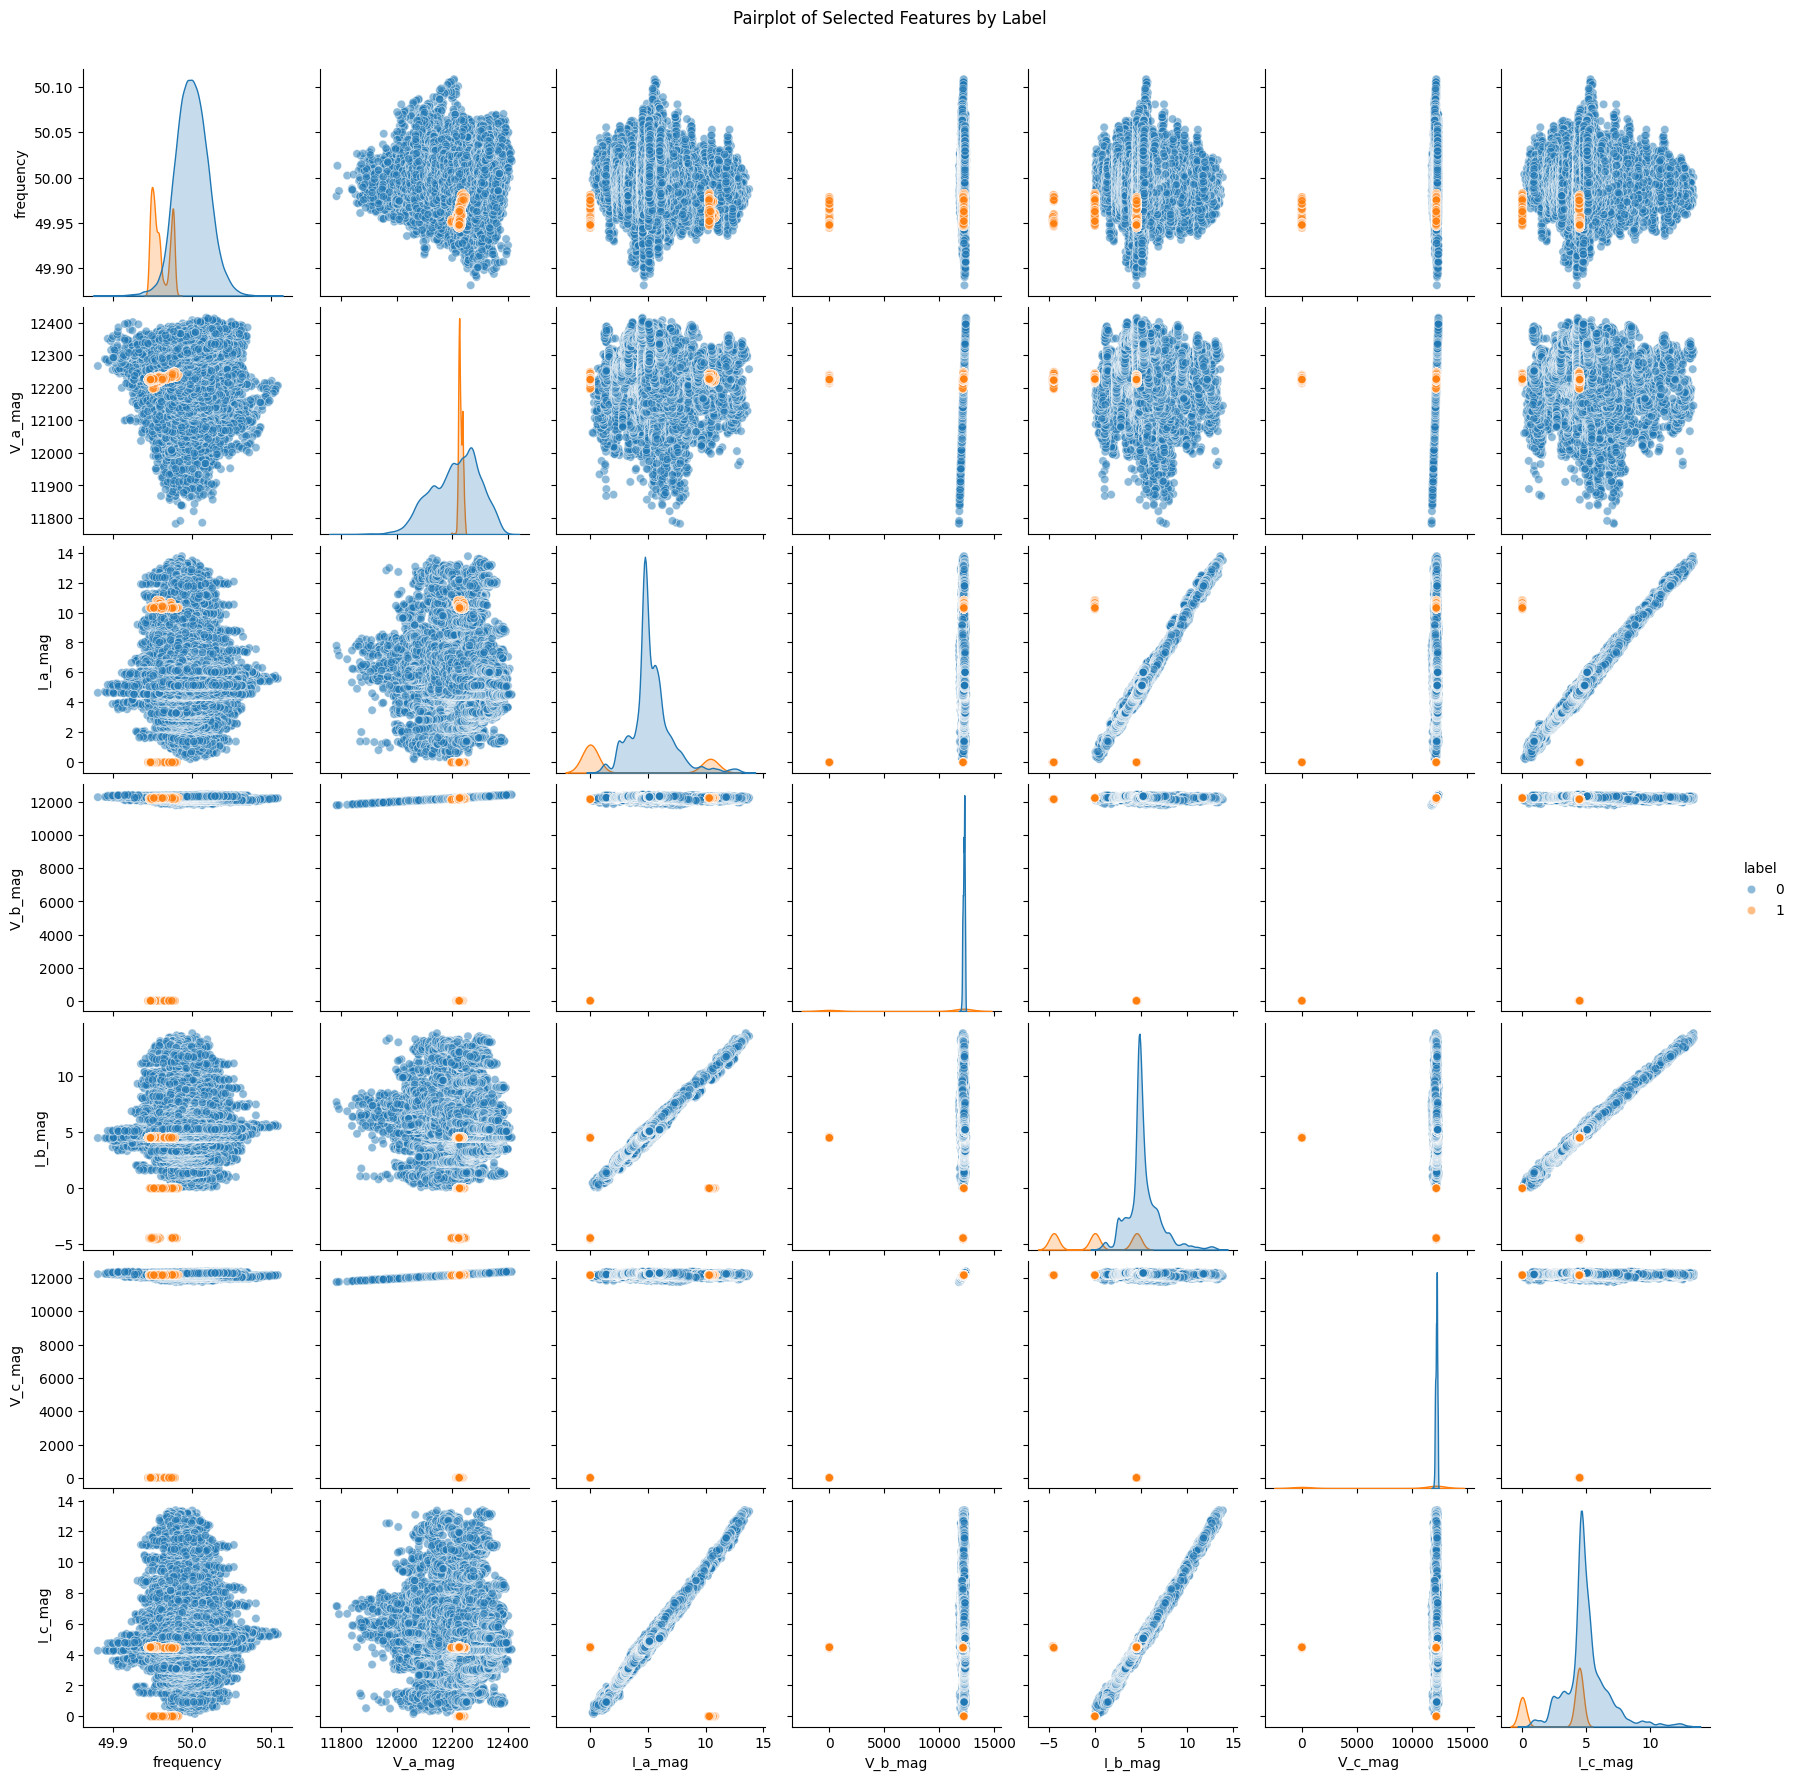

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['frequency', 'V_a_mag', 'I_a_mag', 'V_b_mag', 'I_b_mag', 'V_c_mag', 'I_c_mag', 'label']
sns.pairplot(df[selected_features], hue='label', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Selected Features by Label', y=1.02)
plt.show()
